<h1 style="text-align: center;">Desafío - Regresión desde la econometría</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Regresión desde la econometría`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78283/activities/119111/items/610886">plataforma</a>.

## Habilidades a evaluar
- Reconocer la terminología asociada a la modelación estadística.
- Identificar la regresión lineal y sus fundamentos.
- Interpretar los parámetros estimados en la regresión.
- Interpretar inicialmente estadísticas de bondad de ajuste y coeficientes.
- Reconocer los supuestos en los que la regresión tiene sustento teórico.
- Implementar un modelo de regresión con `statsmodels`.

## Descripción
En la empresa en la cual te encuentras contratado, te solicitan trabajar con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv `Credit` abarca las siguientes variables:
- `Income`: Ingreso anual disponible en miles de dólares.
- `Limit`: Límite del crédito.
- `Rating`: Ranking del crédito.
- `Cards`: Cantidad de tarjetas de crédito.
- `Age`: Edad del usuario.
- `Education`: Años de educación del usuario.
- `Gender`: ¿Hombre o mujer?
- `Student`: ¿Es estudiante?
- `Married`: ¿Está casado?
- `Ethnicity`: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
- `Balance`: Promedio de deuda en tarjeta de crédito de usuario.

El objetivo que persigue el trabajo con esta base de datos es conocer los determinantes de la variación en el promedio de deuda en tarjeta de crédito. Para ello se te solicita generar modelos econométricos para inspeccionar los efectos de distintos atributos a partir de requerimientos que serán detallados más adelante.

## Requerimientos

### 1. Preparar el ambiente de trabajo (1 puntos). Para ello debes:

- Importar las librerías básicas para el análisis de datos.
- Incluir los import base de `statsmodels`.
- Importar la base de datos `Credit.csv` y eliminar la columna `Unnamed: 0`.
- Siguiendo las buenas prácticas, genera variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de `Ethnicity`, genere binarias para `African American` y `Asian`.

_**Tip**_: Utilice `value_counts()` para revisar la cantidad de casos en las variables categóricas.

In [95]:
# Utiliza esta celda para importar los módulos y el set de datos
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Credit.csv', index_col='Unnamed: 0')
df['Gender'] = df['Gender'].apply(lambda x: x.strip()) #Le quitamos todos los espacios a la variable Gender ya que detectamos que hay espacios al comienzo de cada valor de Male
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [96]:
# Dentro de todas las variables categoricas, buscaremos el valor más frecuente para cada una para anotarla posteriormente

var_cat = ['Gender','Student','Married','Ethnicity']

for col in var_cat:
    display(df[col].value_counts())

Female    207
Male      193
Name: Gender, dtype: int64

No     360
Yes     40
Name: Student, dtype: int64

Yes    245
No     155
Name: Married, dtype: int64

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [97]:
# Del resultado anterior, obtenemos que variables debemos quitar (las pasamos como una lista). Luego generamos las variables dummies y quitamos dichas columnas
eliminar = ['Gender_Female', 'Student_No', 'Married_Yes', 'Ethnicity_Caucasian']

df = pd.get_dummies(df)
df = df.drop(eliminar, axis = 1)
df = df.rename({'Ethnicity_African American': 'Ethnicity_African_American'}, axis=1)    #Renombramos esta columna ya que tenia un espacio en su nombre y esto podría generar problemas más adelante en el codigo

df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Male,Student_Yes,Married_No,Ethnicity_African_American,Ethnicity_Asian
1,14.891,3606,283,2,34,11,333,1,0,0,0,0
2,106.025,6645,483,3,82,15,903,0,1,0,0,1
3,104.593,7075,514,4,71,11,580,1,0,1,0,1
4,148.924,9504,681,3,36,11,964,0,0,1,0,1
5,55.882,4897,357,2,68,16,331,1,0,0,0,0


### 2. Generar gráficos descriptivos para las variables continuas (1 punto)

- Genere una función llamada `plot_hist` que genere un histograma de la variable e indique la media y mediana de la misma.
- Agregue una leyenda para indicar qué representa cada línea.
- ¿Cuál es el comportamiento de Balance, Income, Cards y Rating?

In [98]:
# Utiliza esta celda para definir la función plot_hist

def plot_hist(df, variable):
    """
        Objetivo:
            - Generar un histograma, junto con la media, mediana y curva de densidad para una cierta variable
        Parámetros:
            - df (Dataframe): Dataframe donde se encuentra la variable a graficar
            - variable (string): nombre de la variable a graficar

        Retorno:
           - (Grafico) histograma de la variable entregada
    """

    df_tmp = df.copy()

    plt.title(variable)
    sns.histplot(df_tmp[variable], kde=True)
    plt.axvline(df_tmp[variable].mean(), color='red', label=f'Media de {variable}', ls='--')
    plt.axvline(df_tmp[variable].median(), color='blue', label=f'Mediana de {variable}', ls='--')
    plt.legend()

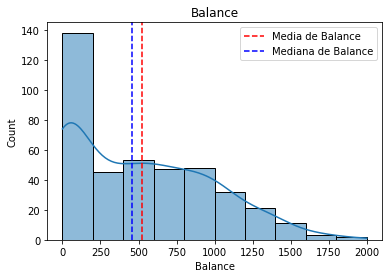

In [99]:
# Utiliza esta celda para generar gráfico de Balance

plot_hist(df, 'Balance')

**Comentarios**

**<font color='green'>No se parece nada a una variable normal, ya que tiene una de sus colas muy cargadas, mas precisamente la cola de la izquierda (negative skew, o sesgo negativo).</font>**

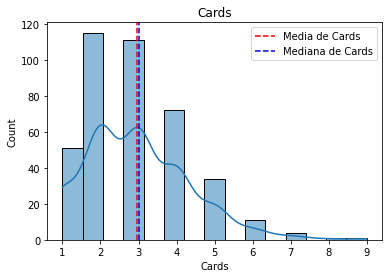

In [100]:
# Utiliza esta celda para generar gráfico de Cards
plot_hist(df, 'Cards')

**Comentarios**

**<font color='green'>al igual que la variable anterior, presenta un alto sesgo en la cola izquierda, concentrado mucho valores en este intervalo.</font>**

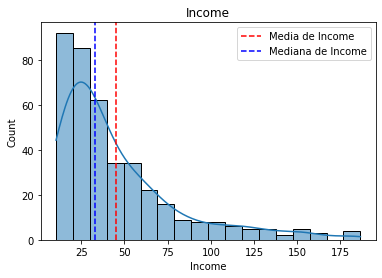

In [101]:
# Utiliza esta celda para generar gráfico de Income
plot_hist(df, 'Income')

**Comentarios**

**<font color='green'>Nuevamente, se presenta un alto sesgo negativo (cola izquierda muy pesada).</font>**

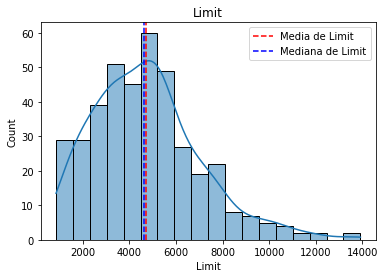

In [102]:
# Utiliza esta celda para generar gráfico de Limit
plot_hist(df, 'Limit')

**Comentarios**

**<font color='green'>Para esta distribucion, se asemeja un poco mejor a la forma de una normal, pero nuevamente presenta un alto sesgo negativo (cola izquierda pesada).</font>**

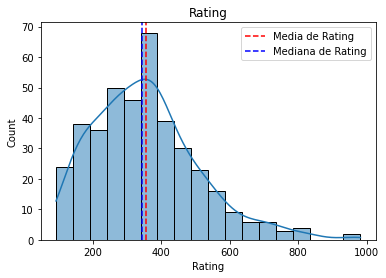

In [103]:
# Utiliza esta celda para generar gráfico de Rating
plot_hist(df, 'Rating')

**Comentarios**

**<font color='green'>identico al anterior, alto sesgo negativo.</font>**

### 3. Regresión Lineal Simple (2 puntos). 

- Para ello se debe generar una serie de modelos simples utilizando `statsmodels`:
$$
\text{Balance}_i = \beta_0 + \gamma_{student} \cdot \text{student}_i + \epsilon_i \\
\text{Balance}_i = \beta_0 + \beta_{income} \cdot \text{income}_i + \epsilon_i \\
\text{Balance}_i = \beta_0 + \beta_{rating} \cdot \text{rating}_i + \epsilon_i
$$

In [104]:
# Utiliza esta celda para generar y entrenar los 3 modelos solicitados

modelo_student = smf.ols('Balance ~ Student_Yes', data = df).fit()
modelo_income = smf.ols('Balance ~ Income', data = df).fit()
modelo_rating = smf.ols('Balance ~ Rating', data = df).fit()

- ¿Qué variable presenta un mayor poder explicativo de la variabilidad de `Balance`?

In [105]:
# Utiliza esta celda para explorar el poder explicativo de la variabilidad de Balance en los 3 modelos

display(modelo_student.summary().tables[0])
print('-'*60)
display(modelo_income.summary().tables[0])
print('-'*60)
modelo_rating.summary().tables[0]

Dep. Variable:,Balance,R-squared:,0.067
Model:,OLS,Adj. R-squared:,0.065
Method:,Least Squares,F-statistic:,28.62
Date:,"Wed, 19 Oct 2022",Prob (F-statistic):,1.49e-07
Time:,23:53:33,Log-Likelihood:,-3005.5
No. Observations:,400,AIC:,6015.
Df Residuals:,398,BIC:,6023.
Df Model:,1,,
Covariance Type:,nonrobust,,


------------------------------------------------------------


Dep. Variable:,Balance,R-squared:,0.215
Model:,OLS,Adj. R-squared:,0.213
Method:,Least Squares,F-statistic:,109.0
Date:,"Wed, 19 Oct 2022",Prob (F-statistic):,1.03e-22
Time:,23:53:33,Log-Likelihood:,-2970.9
No. Observations:,400,AIC:,5946.
Df Residuals:,398,BIC:,5954.
Df Model:,1,,
Covariance Type:,nonrobust,,


------------------------------------------------------------


Dep. Variable:,Balance,R-squared:,0.746
Model:,OLS,Adj. R-squared:,0.745
Method:,Least Squares,F-statistic:,1168.
Date:,"Wed, 19 Oct 2022",Prob (F-statistic):,1.90e-120
Time:,23:53:33,Log-Likelihood:,-2745.4
No. Observations:,400,AIC:,5495.
Df Residuals:,398,BIC:,5503.
Df Model:,1,,
Covariance Type:,nonrobust,,


**Respuesta**

**<font color='green'>Claramente, la que presenta un mayor poder explicativo frente a la variable Balance es el modelo con la variable Rating.</font>**

- ¿Qué podemos decir sobre el comportamiento de Student?

In [106]:
# Utiliza esta celda para explorar los valores de los coeficientes del modelo Balance ~ Student

modelo_student.params

Intercept      480.369444
Student_Yes    396.455556
dtype: float64

**Respuesta**

**<font color='green'>Podemos decir que si es entudiantes, este aporta al valor Balance en un incremento de 396 (en las unidades correspondientes al credito reflejado), mientras que si no es estudiante, el valor promedio del credito es de 480 aproximadamente.</font>**

- ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

In [107]:
# Utiliza esta celda para realizar la prueba de hipótesis solicitada
from scipy.stats import ttest_ind

ttest_ind(df[df['Student_Yes']==0]['Balance'], df[df['Student_Yes']==1]['Balance'])


Ttest_indResult(statistic=-5.349964123075003, pvalue=1.487734107732302e-07)

**Comentarios de la prueba de hipótesis realizada**

**<font color='green'>Con un p-value de practicamente cero, podemos rechazar la hipotesis nula, es decir, existe evidencia sufiente para decir que la distribucion de los valores de Balance, tanto para los grupos de estudiantes y no estudiantes son  diferentes, con una confienza del 95%.</font>**

### 4. Generar un modelo que incluya todos los regresores (2 puntos):
A partir de la siguiente fórmula, genere el modelo que incluya dichos regresores

$$
\text{Balance}_i = \beta_0 + \sum_{j=1}^{n} \beta_{j} \cdot x_{ij} + \epsilon_i
$$

- $j$: Cantidad de tributos del modelo. **Para las variables categóricas, considerar solamente las variables binarias generadas, y omitir las columnas de las variables categóricas originales**

In [110]:
# Sugerencia: Utiliza esta celda para explorar las columnas del set de datos

columnas = df.select_dtypes(np.number).columns
columnas = columnas.drop('Balance')
regresores = ' + '.join(columnas)

In [111]:
# Utiliza esta celda para generar el modelo solicitado

modelo_full = smf.ols(f'Balance ~ {regresores}', data = df).fit()
modelo_full.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                   OLS                   Adj. R-squared:          0.954    
Dependent Variable:      Balance               AIC:                     4821.3704
Date:                    2022-10-19 23:53      BIC:                     4869.2680
No. Observations:        400                   Log-Likelihood:          -2398.7  
Df Model:                11                    F-statistic:             750.3    
Df Residuals:            388                   Prob (F-statistic):      1.11e-253
R-squared:               0.955                 Scale:                   9759.6   
---------------------------------------------------------------------------------
                             Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
---------------------------------------------------------------------------------
Intercept                  -488.2880  34.8161 -14.0248 0.0000 -556.7397 -419.8362
Income                       -7.8031   0.2342 -33.3136 0.0000   -8.2636   -7.3426
Limit                         0.1909   0.0328   5.8241 0.0000    0.1265    0.2554
Rating                        1.1365   0.4909   2.3152 0.0211    0.1714    2.1017
Cards                        17.7245   4.3410   4.0830 0.0001    9.1896   26.2594
Age                          -0.6139   0.2940  -2.0882 0.0374   -1.1919   -0.0359
Education                    -1.0989   1.5980  -0.6877 0.4921   -4.2406    2.0429
Gender_Male                  10.6532   9.9140   1.0746 0.2832   -8.8386   30.1451
Student_Yes                 425.7474  16.7226  25.4594 0.0000  392.8691  458.6256
Married_No                    8.5339  10.3629   0.8235 0.4107  -11.8405   28.9083
Ethnicity_African_American  -10.1070  12.2099  -0.8278 0.4083  -34.1129   13.8989
Ethnicity_Asian               6.6972  12.1224   0.5525 0.5810  -17.1367   30.5310
---------------------------------------------------------------------------------
Omnibus:                    34.899            Durbin-Watson:               1.968 
Prob(Omnibus):              0.000             Jarque-Bera (JB):            41.766
Skew:                       0.782             Prob(JB):                    0.000 
Kurtosis:                   3.241             Condition No.:               37395 
=================================================================================
* The condition number is large (4e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

- Comente brevemente sobre el poder explicativo en la varianza de $y$

In [122]:
# Utiliza esta celda para explorar el poder explicativo en la varianza de Balance
modelo_full.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.954
1,Dependent Variable:,Balance,AIC:,4821.3704
2,Date:,2022-10-20 00:13,BIC:,4869.2680
3,No. Observations:,400,Log-Likelihood:,-2398.7
4,Df Model:,11,F-statistic:,750.3
5,Df Residuals:,388,Prob (F-statistic):,1.11e-253
6,R-squared:,0.955,Scale:,9759.6


**Comentarios**

**<font color='green'>Se puede apreciar, por el R2, que nuestro modelo tiene un muy alto poder explicativo con respecto a la variable Balance, dicho de otro, nuestras variables estan logrando explicar el 95,4% de la variabilidad total de la variable Balance.</font>**

- Comente sobre las principales características de los predictores.

In [118]:
# Utiliza esta celda para almacenar los coeficientes y sus significancias. Tip: puede usar summary2.tables[1] y almacenar el resultado en una variable (será de tipo DataFrame)

table = modelo_full.summary2().tables[1]

In [119]:
# Utiliza esta celda para explorar los atributos que aumentan el balance en forma significativa (considerando alpha 0.025)

table_025 = table[table['P>|t|'] <= 0.025]
table_025[table_025['Coef.'] > 0] 

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Limit,0.190907,0.032779,5.824124,1.205974e-08,0.126461,0.255353
Rating,1.136527,0.490894,2.315216,2.112213e-02,0.171380,2.101673
Cards,17.724484,4.341033,4.083011,5.401200e-05,9.189592,26.259375
Student_Yes,425.747360,16.722580,25.459430,8.854521e-85,392.869147,458.625572


In [120]:
# Utiliza esta celda para explorar los atributos que disminuyen el balance en forma significativa (considerando alpha 0.025)

table_025[table_025['Coef.'] < 0]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-488.287994,34.816063,-14.024791,1.953141e-36,-556.739746,-419.836241
Income,-7.803102,0.234232,-33.313573,7.372312e-116,-8.263624,-7.342579


In [121]:
# Utiliza esta celda para explorar los atributos que no modifican el balance de forma significativa significativos (considerando alpha 0.025)

table[table['P>|t|'] > 0.025]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Age,-0.613909,0.293989,-2.088200,0.037431,-1.191920,-0.035897
Education,-1.098855,1.597951,-0.687665,0.492075,-4.240582,2.042872
Gender_Male,10.653248,9.914000,1.074566,0.283237,-8.838637,30.145132
Married_No,8.533901,10.362875,0.823507,0.410726,-11.840515,28.908316
Ethnicity_African_American,-10.107025,12.209923,-0.827771,0.408309,-34.112917,13.898867
Ethnicity_Asian,6.697154,12.122442,0.552459,0.580952,-17.136741,30.531049


**Comentarios**

**<font color='green'>Para los predictores, se observa que hay ciertas variables que no tiene un efecto predictivo significativo en nuestra variable Balance, como es el caso de la variable `Education`, `Gender_Male`, `Married_No`, `Ethnicity_African_American` y `Ethnicity_Asian`.</font>**

**<font color='green'>Por otro lado, de las variables que si tienen un efecto predictivo en nuestra variable Balance, algunas tienen un efecto positivo y negativo, como son las variables `Limit`, `Rating`, `Cards` y `Student_Yes`. En cambio, otras tienen un efecto negativo en Balance como la variable `Income` </font>**

### 5. Depurar el modelo e incluya sólo los predictores significativo (2 puntos)
- En base al modelo anterior, refactoriza e incluya sólo las variables con un nivel de significancia _p-value_ $\leq 0.025$. 

In [124]:
# Utiliza esta celda para generar el modelo depurado

modelo_depurado = smf.ols(f'Balance ~ {" + ".join(table_025.index.drop("Intercept"))}', data = df).fit()
modelo_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.954    
Dependent Variable: Balance          AIC:                4817.6668
Date:               2022-10-20 00:14 BIC:                4841.6156
No. Observations:   400              Log-Likelihood:     -2402.8  
Df Model:           5                F-statistic:        1640.    
Df Residuals:       394              Prob (F-statistic): 3.60e-261
R-squared:          0.954            Scale:              9812.4   
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept   -526.1555  19.7466 -26.6454 0.0000 -564.9774 -487.3336
Income        -7.8749   0.2315 -34.0236 0.0000   -8.3300   -7.4199
Limit          0.1944   0.0325   5.9768 0.0000    0.1305    0.2584
Rating         1.0879   0.4870   2.2339 0.0260    0.1305    2.0453
Cards         17.8517   4.3349   4.1182 0.0000    9.3293   26.3741
Student_Yes  426.8501  16.5740  25.7542 0.0000  394.2656  459.4347
------------------------------------------------------------------
Omnibus:               30.263       Durbin-Watson:          1.949 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       35.257
Skew:                  0.722        Prob(JB):               0.000 
Kurtosis:              3.179        Condition No.:          21155 
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

- Comente brevemente sobre el poder explicativo en la varianza de $y$

In [125]:
# Utiliza esa celda para explorar el poder explicativ en la varianza de Balance

modelo_depurado.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.954
1,Dependent Variable:,Balance,AIC:,4817.6668
2,Date:,2022-10-20 00:16,BIC:,4841.6156
3,No. Observations:,400,Log-Likelihood:,-2402.8
4,Df Model:,5,F-statistic:,1640.
5,Df Residuals:,394,Prob (F-statistic):,3.60e-261
6,R-squared:,0.954,Scale:,9812.4


**Comentarios**

**<font color='green'>al igual que en el modelo anterior, dejando solo las variables significativas para el modelo, practicamente mantenemos el mismo R2, mantendiendo lograr explicar el 95,4% de la variabilidad total de Balance con nuestras variables ingresadas en el modelo.</font>**

- Comente brevemente las principales características de los predictores.

In [132]:
# Utiliza esta celda para almacenar los coeficientes y sus significancias

table_depurada = modelo_depurado.summary2().tables[1]
table_depurada_sub = table_depurada[['Coef.', 'P>|t|']]
table_depurada_sub

,Coef.,P>|t|
Intercept,-526.155523,3.539640e-90
Income,-7.874924,2.488284e-119
Limit,0.194409,5.098874e-09
Rating,1.087901,2.604970e-02
Cards,17.851731,4.655806e-05
Student_Yes,426.850146,1.786842e-86


In [137]:
# Utiliza esta celda para explorar los atributos que aumentan el balance en forma significativa (considerando alpha 0.025)

table_depurada_025 = table_depurada[table_depurada['P>|t|'] <= 0.025]
table_depurada_025[table_depurada_025['Coef.'] > 0]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Limit,0.194409,0.032527,5.976794,5.098874e-09,0.130460,0.258358
Cards,17.851731,4.334889,4.118152,4.655806e-05,9.329326,26.374136
Student_Yes,426.850146,16.574025,25.754163,1.786842e-86,394.265559,459.434732


In [138]:
# Utiliza esta celda para explorar los atributos que disminuyen el balance en forma significativa (considerando alpha 0.025)

table_depurada_025[table_depurada_025['Coef.'] < 0]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-526.155523,19.746614,-26.645355,3.539640e-90,-564.977429,-487.333618
Income,-7.874924,0.231455,-34.023627,2.488284e-119,-8.329964,-7.419884


In [139]:
# Utiliza esta celda para explorar los atributos que no modifican el balance de forma significativa significativos (considerando alpha 0.025)

table_depurada[table_depurada['P>|t|'] > 0.025]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Rating,1.087901,0.486995,2.233907,0.02605,0.130468,2.045335


**Comentarios**

**<font color='green'>Para los predictores, se observa que hay ciertas variables que no tiene un efecto predictivo significativo en nuestra variable Balance, como es el caso de la variable `Rating` aunque se encuentre muy al borde de nuestro punto de corte.</font>**

**<font color='green'>Por otro lado, de las variables que si tienen un efecto predictivo en nuestra variable Balance, algunas tienen un efecto positivo y negativo, como son las variables `Limit`, `Cards` y `Student_Yes`. En cambio, otras tienen un efecto negativo en Balance como la variable `Income` </font>**

- ¿Mejoró o empeoró el modelo con la reducción de regresores?

**Respuesta**

**<font color='green'>En cuanto a la parsimonia del modelo (cantidad de variables), si hubo mejora ya que obtuvimos los mismo resultados en termino de R2 con menos variables que el modelo full</font>**

### 6. Utilizando `lmplot` de `seaborn`, inspeccione el comportamiento de los tres principales determinantes. (2 puntos)

Considere los 3 con valores más bajos de _p-value_ del último modelo generado

In [141]:
# Utiliza esta celda para mostrar los coeficientes con los 3 p-values más bajos (no considere el intercepto)

significativas = modelo_full.summary2().tables[1].sort_values(by='P>|t|').head(4).index.drop('Intercept').to_list()

['Income', 'Student_Yes', 'Limit']

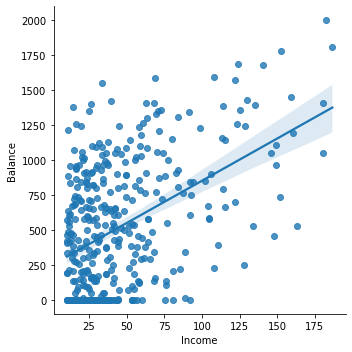

In [144]:
# Utiliza esta celda para graficar el primer atributo
import warnings
warnings.simplefilter('ignore')

sns.lmplot(significativas[0], 'Balance', df)

**Comentarios**

**<font color='green'>Si vemos la recta, se ve que hay muchos valores muy lejanos a nuestra recta de regresion, esto ya que los valores estan muy dispersos y es imposible poder caracterizar de buena manera estas variables a traves de una lines recta.</font>**

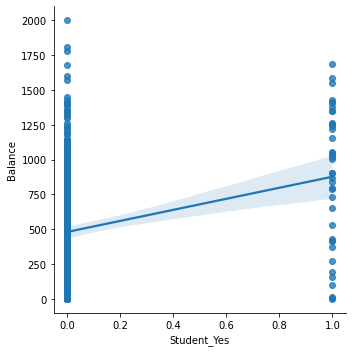

In [145]:
# Utiliza esta celda para graficar el segundo atributo

sns.lmplot(significativas[1], 'Balance', df)

**Comentarios**

**<font color='green'>Este caso es algo particular, ya que estamos comparando frente a una variable dicotomica, a si que es imposible caracterizar dichas variables a traves de una recta de regresion.</font>**

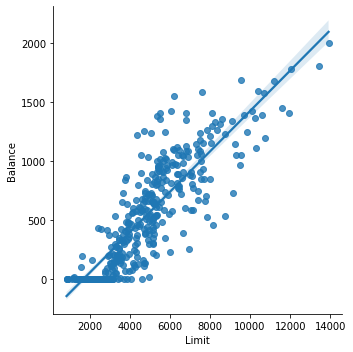

In [146]:
# Utiliza esta celda para graficar el tercer atributo

sns.lmplot(significativas[2], 'Balance', df)

**Comentarios**

**<font color='green'>A diferencia de los otros dos graficos anteriores, aquí si se puede apreciar un leve ordenamiento de  los datos dispersos, ya que se ve como estos tienden a tener el mismo comportamiento que la recta de regresion  ya que a medida que aumenta los valores de la variable limit, aumentan los valores de la variable Balance.</font>**